Distinct Bookings: 339
Distinct Sessions: 306
Distinct Searches: 339
Sessions with More Than One Booking: 26


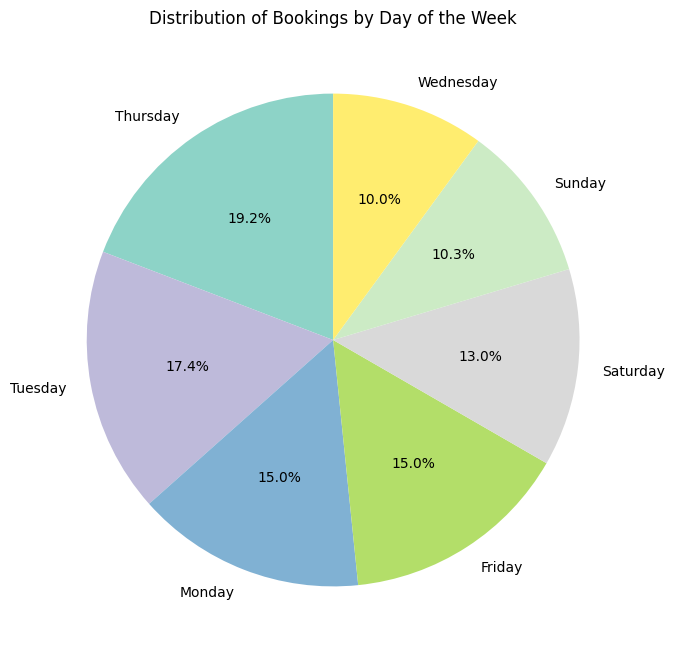

Day with the Highest Bookings: Thursday
  service_name  total_bookings   total_gbv
0      GOIBIBO             186  5897637.97
1          MMT              48   665669.08
2        YATRA             105  3378702.13
Most Booked Route: ('Gurgaon', 'Roissy-en-France')
Top 3 Departure Cities (Advance Booking):
from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


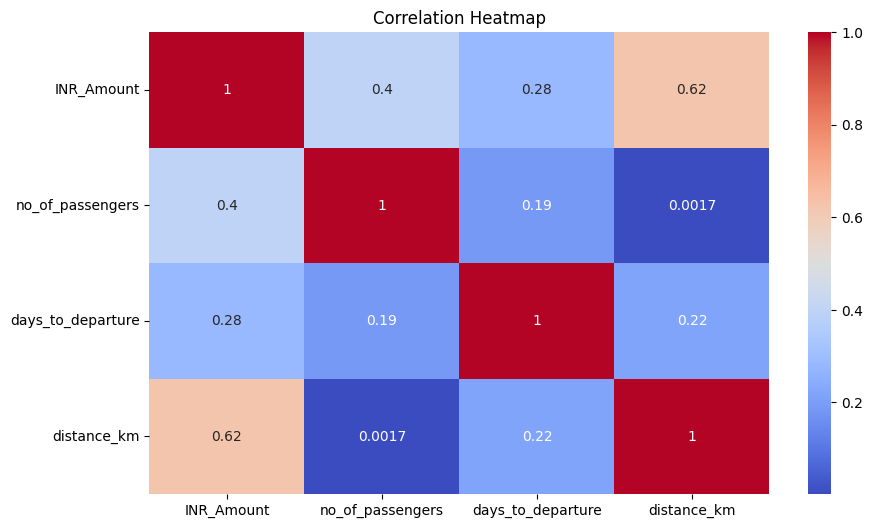

Most Used Device Type by Service:
service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
Name: device_type_used, dtype: object


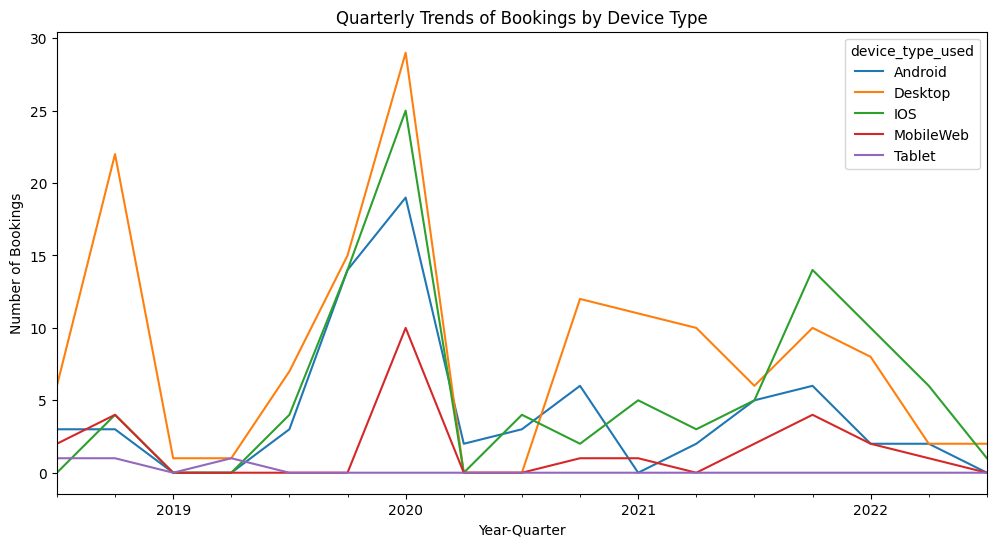

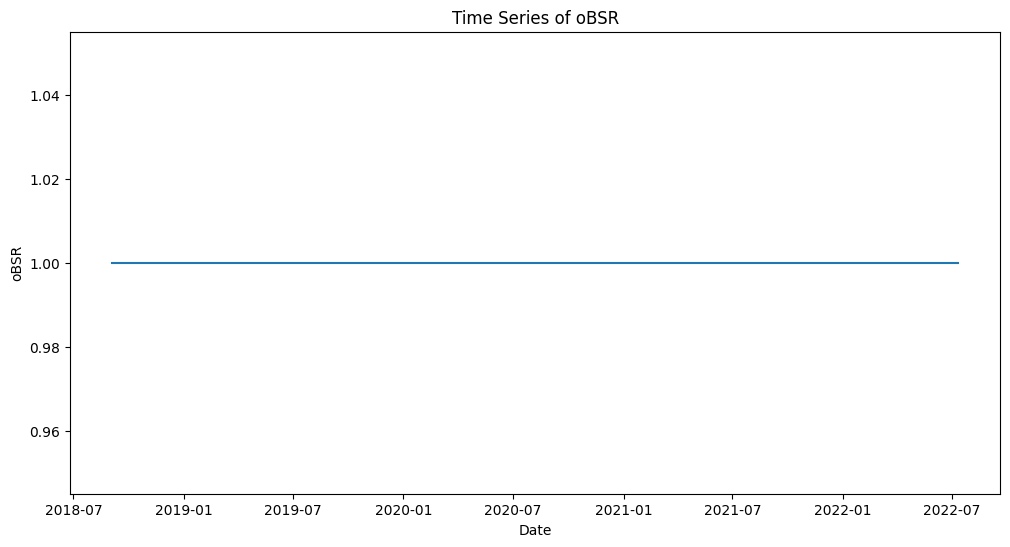

Average oBSR by Month:
month
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
Name: booking_id, dtype: float64
Average oBSR by Day of the Week:
day_of_week
Friday       1.0
Monday       1.0
Saturday     1.0
Sunday       1.0
Thursday     1.0
Tuesday      1.0
Wednesday    1.0
Name: booking_id, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, message="Converting to PeriodArray/Index representation will drop timezone information")

# Convert to quarterly periods
df['year_quarter'] = df['booking_time'].dt.to_period('Q')

# Load the dataset
df = pd.read_csv('Bookings.csv')

# Convert booking_time to datetime
df['booking_time'] = pd.to_datetime(df['booking_time'])

# 1. Find the number of distinct bookings, sessions, and searches
distinct_bookings = df['booking_id'].nunique()
distinct_sessions = df['customer_id'].nunique()
distinct_searches = df.shape[0]

print(f"Distinct Bookings: {distinct_bookings}")
print(f"Distinct Sessions: {distinct_sessions}")
print(f"Distinct Searches: {distinct_searches}")

# 2. How many sessions have more than one booking
sessions_with_multiple_bookings = df['customer_id'].value_counts()
sessions_with_more_than_one_booking = sessions_with_multiple_bookings[sessions_with_multiple_bookings > 1].count()
print(f"Sessions with More Than One Booking: {sessions_with_more_than_one_booking}")

# 3. Which days of the week have the highest number of bookings? Also, draw a pie chart
df['day_of_week'] = df['booking_time'].dt.day_name()
bookings_by_day = df['day_of_week'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
bookings_by_day.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Bookings by Day of the Week')
plt.ylabel('')  # Hide the y-label for aesthetics
plt.show()

day_with_highest_bookings = bookings_by_day.idxmax()
print(f"Day with the Highest Bookings: {day_with_highest_bookings}")

# 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR
service_summary = df.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gbv=('INR_Amount', 'sum')
).reset_index()
print(service_summary)

# 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?
df_multi_bookings = df[df['customer_id'].isin(sessions_with_multiple_bookings.index[sessions_with_multiple_bookings > 1])]
most_booked_route = df_multi_bookings.groupby(['from_city', 'to_city']).size().idxmax()
print(f"Most Booked Route: {most_booked_route}")

# 6. Top 3 departure cities from where customers book mostly in advance (at least 5 departures)
top_departure_cities = df[df.groupby('from_city')['from_city'].transform('count') >= 5]
top_advance_booking_cities = top_departure_cities.groupby('from_city')['days_to_departure'].mean().nlargest(3)
print(f"Top 3 Departure Cities (Advance Booking):\n{top_advance_booking_cities}")

# 7. Plot a heatmap displaying correlations of the numerical columns
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 8. For each service, which is the most used device type for making bookings?
most_used_device_by_service = df.groupby('service_name')['device_type_used'].agg(lambda x: x.value_counts().index[0])
print(f"Most Used Device Type by Service:\n{most_used_device_by_service}")

# 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types
df['year_quarter'] = df['booking_time'].dt.to_period('Q')
device_trends = df.groupby(['year_quarter', 'device_type_used']).size().unstack().fillna(0)

# Plot time series
device_trends.plot(kind='line', figsize=(12, 6))
plt.title('Quarterly Trends of Bookings by Device Type')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Bookings')
plt.show()

# 10. Calculate the average oBSR for each month and each day of the week, and plot a time series
df['month'] = df['booking_time'].dt.month
df['day'] = df['booking_time'].dt.day

# Example calculation of oBSR (booking/search ratio)
oBSR_by_month = df.groupby('month')['booking_id'].apply(lambda x: x.nunique() / x.shape[0])
oBSR_by_day = df.groupby('day_of_week')['booking_id'].apply(lambda x: x.nunique() / x.shape[0])

# Plot time series of oBSR
oBSR_time_series = df.groupby(df['booking_time'].dt.date).apply(lambda x: x['booking_id'].nunique() / x.shape[0])

plt.figure(figsize=(12, 6))
oBSR_time_series.plot()
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.show()

print(f"Average oBSR by Month:\n{oBSR_by_month}")
print(f"Average oBSR by Day of the Week:\n{oBSR_by_day}")
